In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import glob



Text(0, 0.5, 'Force (kN)')

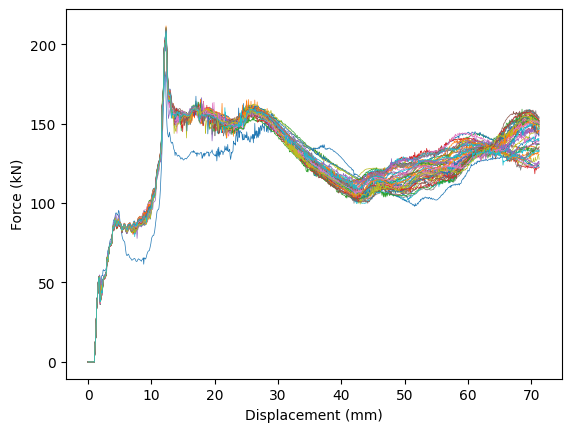

In [9]:
for i in range(1, 51):
    df = pd.read_csv('Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv/CRUSHING_'+str(i)+'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=0.5)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')

FileNotFoundError: [Errno 2] No such file or directory: 'Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv/CRUSHING_1000_data.csv'

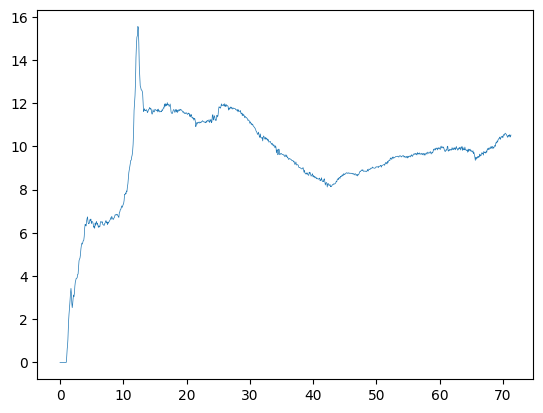

In [10]:
# Calculate energy
energy_df = pd.DataFrame()

for test_number in range(1, 51):
    df = pd.read_csv('Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv/CRUSHING_'+str(i)+'_data.csv')
    energy_array = [0]
    for i in range (1, len(df)):
        delta_displacement = (df['DMM'].iloc[i] - df['DMM'].iloc[i-1])
        mean_force = (df['FKN'].iloc[i-1] + df['FKN'].iloc[i])/2
        energy_array.append(mean_force * delta_displacement)
    energy_sum_df = pd.DataFrame({'Energy': [sum(energy_array)]})
    energy_df = pd.concat([energy_df, energy_sum_df], ignore_index=True)
    plt.plot(df['DMM'], energy_array, linewidth=0.5)

    

In [80]:
print(energy_df)

        Energy
0   764.079973
1   800.492940
2   807.657190
3   757.578459
4   792.833828
..         ...
95  799.705783
96  755.083668
97  897.088707
98  832.334486
99  834.075810

[100 rows x 1 columns]


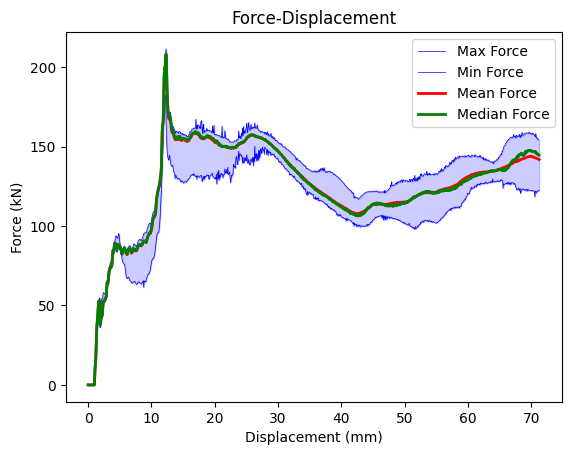

In [18]:
# Assuming the files are in a folder called 'Simulation_BENDING/Results'
folder_path = 'Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv'
file_pattern = os.path.join(folder_path, 'CRUSHING_*_data.csv')
file_list = glob.glob(file_pattern)

# Initialize lists to hold all the data
all_force_data = []

# Read each file and append the force data to the list
for file in file_list:
    df = pd.read_csv(file)
    displacement = df['DMM']  # Assuming 'DMM' is the displacement column
    force = df['FKN']         # Assuming 'FKN' is the force column
    all_force_data.append(force)

# Convert the list of series into a DataFrame
force_data_df = pd.concat(all_force_data, axis=1)

# Calculate max, min, and mean values across columns for each displacement
max_force = force_data_df.max(axis=1)
min_force = force_data_df.min(axis=1)
mean_force = force_data_df.mean(axis=1)
median_force = force_data_df.median(axis=1)


# Now plot these as functions of displacement
plt.plot(displacement, max_force, label='Max Force', linewidth=0.5, color='blue')
plt.plot(displacement, min_force, label='Min Force', linewidth=0.5, color='blue')
plt.plot(displacement, mean_force, label='Mean Force', linewidth=2, color='red')
plt.plot(displacement, median_force, label='Median Force', linewidth=2, color='green')
plt.fill_between(displacement, min_force, max_force, color='blue', alpha=0.2)

# Add labels and legend
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force-Displacement')
plt.legend()

plt.show()


In [21]:
max_force_df = pd.DataFrame()
parameters = pd.read_csv('Simulation_CRUSHING/parameters_v3.csv')
for i in range(50):
    new_data = pd.read_csv('Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv/CRUSHING_'+str(i+1)+'_data.csv')
    max_force = new_data['FKN'].max()
    new_data_df = pd.DataFrame()
    new_data_df['max_force'] = [max_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    max_force_df = pd.concat([max_force_df, new_data_df])

max_force_df.reset_index(drop=True, inplace=True)
max_force_df = max_force_df.drop(columns=['sample'])

max_force_df.head()

,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,204.886297,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,209.503500,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,210.079734,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,209.322422,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,207.681906,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


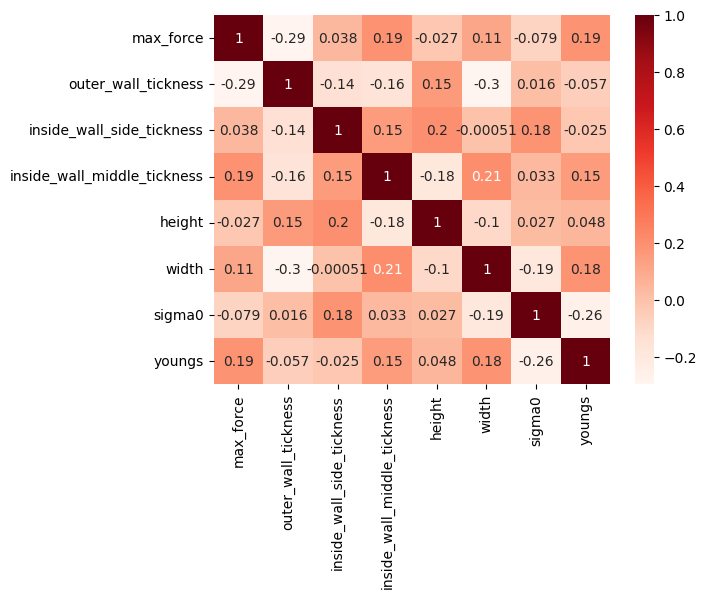

In [22]:
dataplot = sb.heatmap(max_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

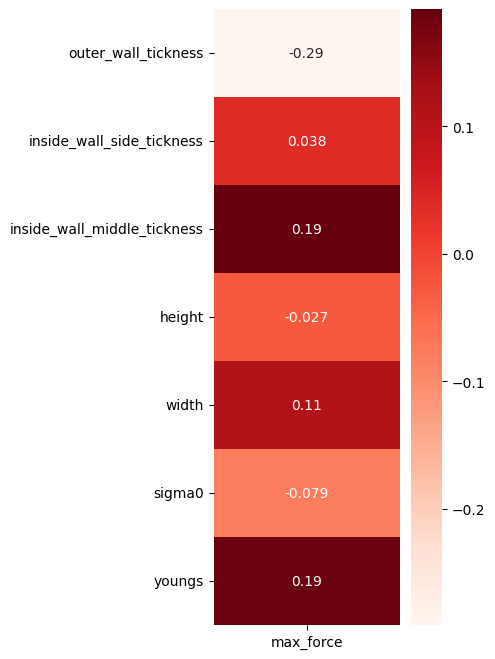

In [23]:
correlation_matrix = max_force_df.corr()
fkn_correlation = correlation_matrix[['max_force']].drop('max_force')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [27]:
mean_force_df = pd.DataFrame()

for i in range(50):
    new_data = pd.read_csv('Simulation_CRUSHING/Locked_crushing_thickness/CRUSHING_X_data.csv/CRUSHING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].mean()
    new_data_df = pd.DataFrame()
    new_data_df['mean_force'] = [mean_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    mean_force_df = pd.concat([mean_force_df, new_data_df])

mean_force_df.reset_index(drop=True, inplace=True)
mean_force_df = mean_force_df.drop(columns=['sample'])

mean_force_df.head()

,mean_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,116.836891,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,120.458615,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,120.810000,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,119.547320,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,120.708946,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


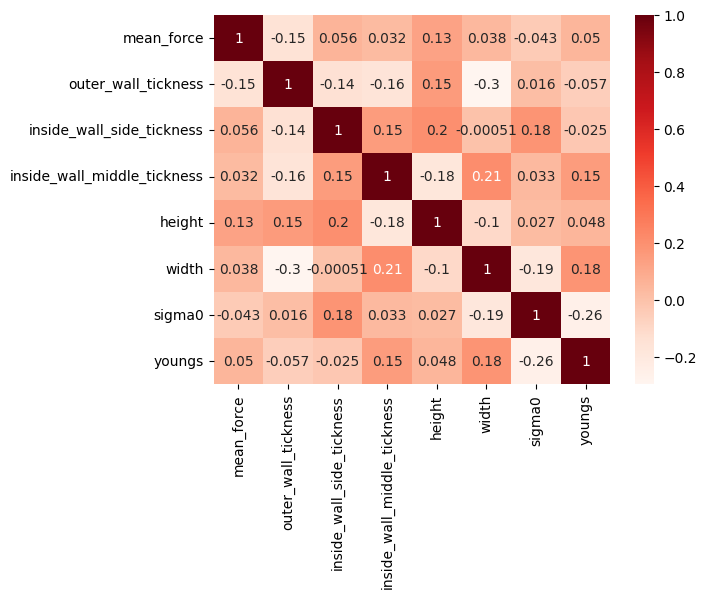

In [28]:
dataplot = sb.heatmap(mean_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

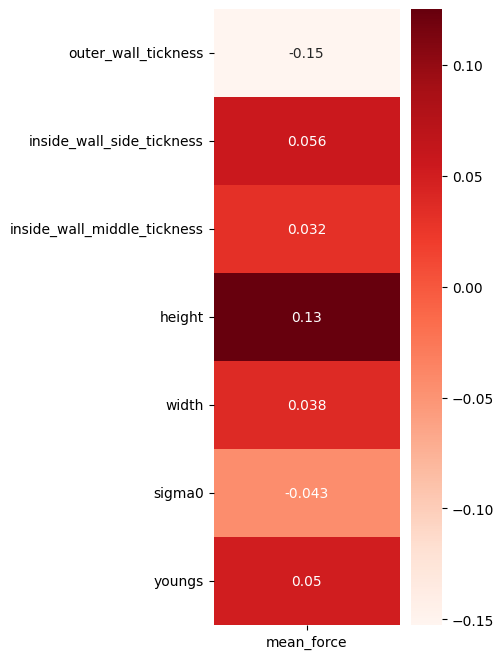

In [29]:
correlation_matrix = mean_force_df.corr()
fkn_correlation = correlation_matrix[['mean_force']].drop('mean_force')

plt.figure(figsize=(3, 8))
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

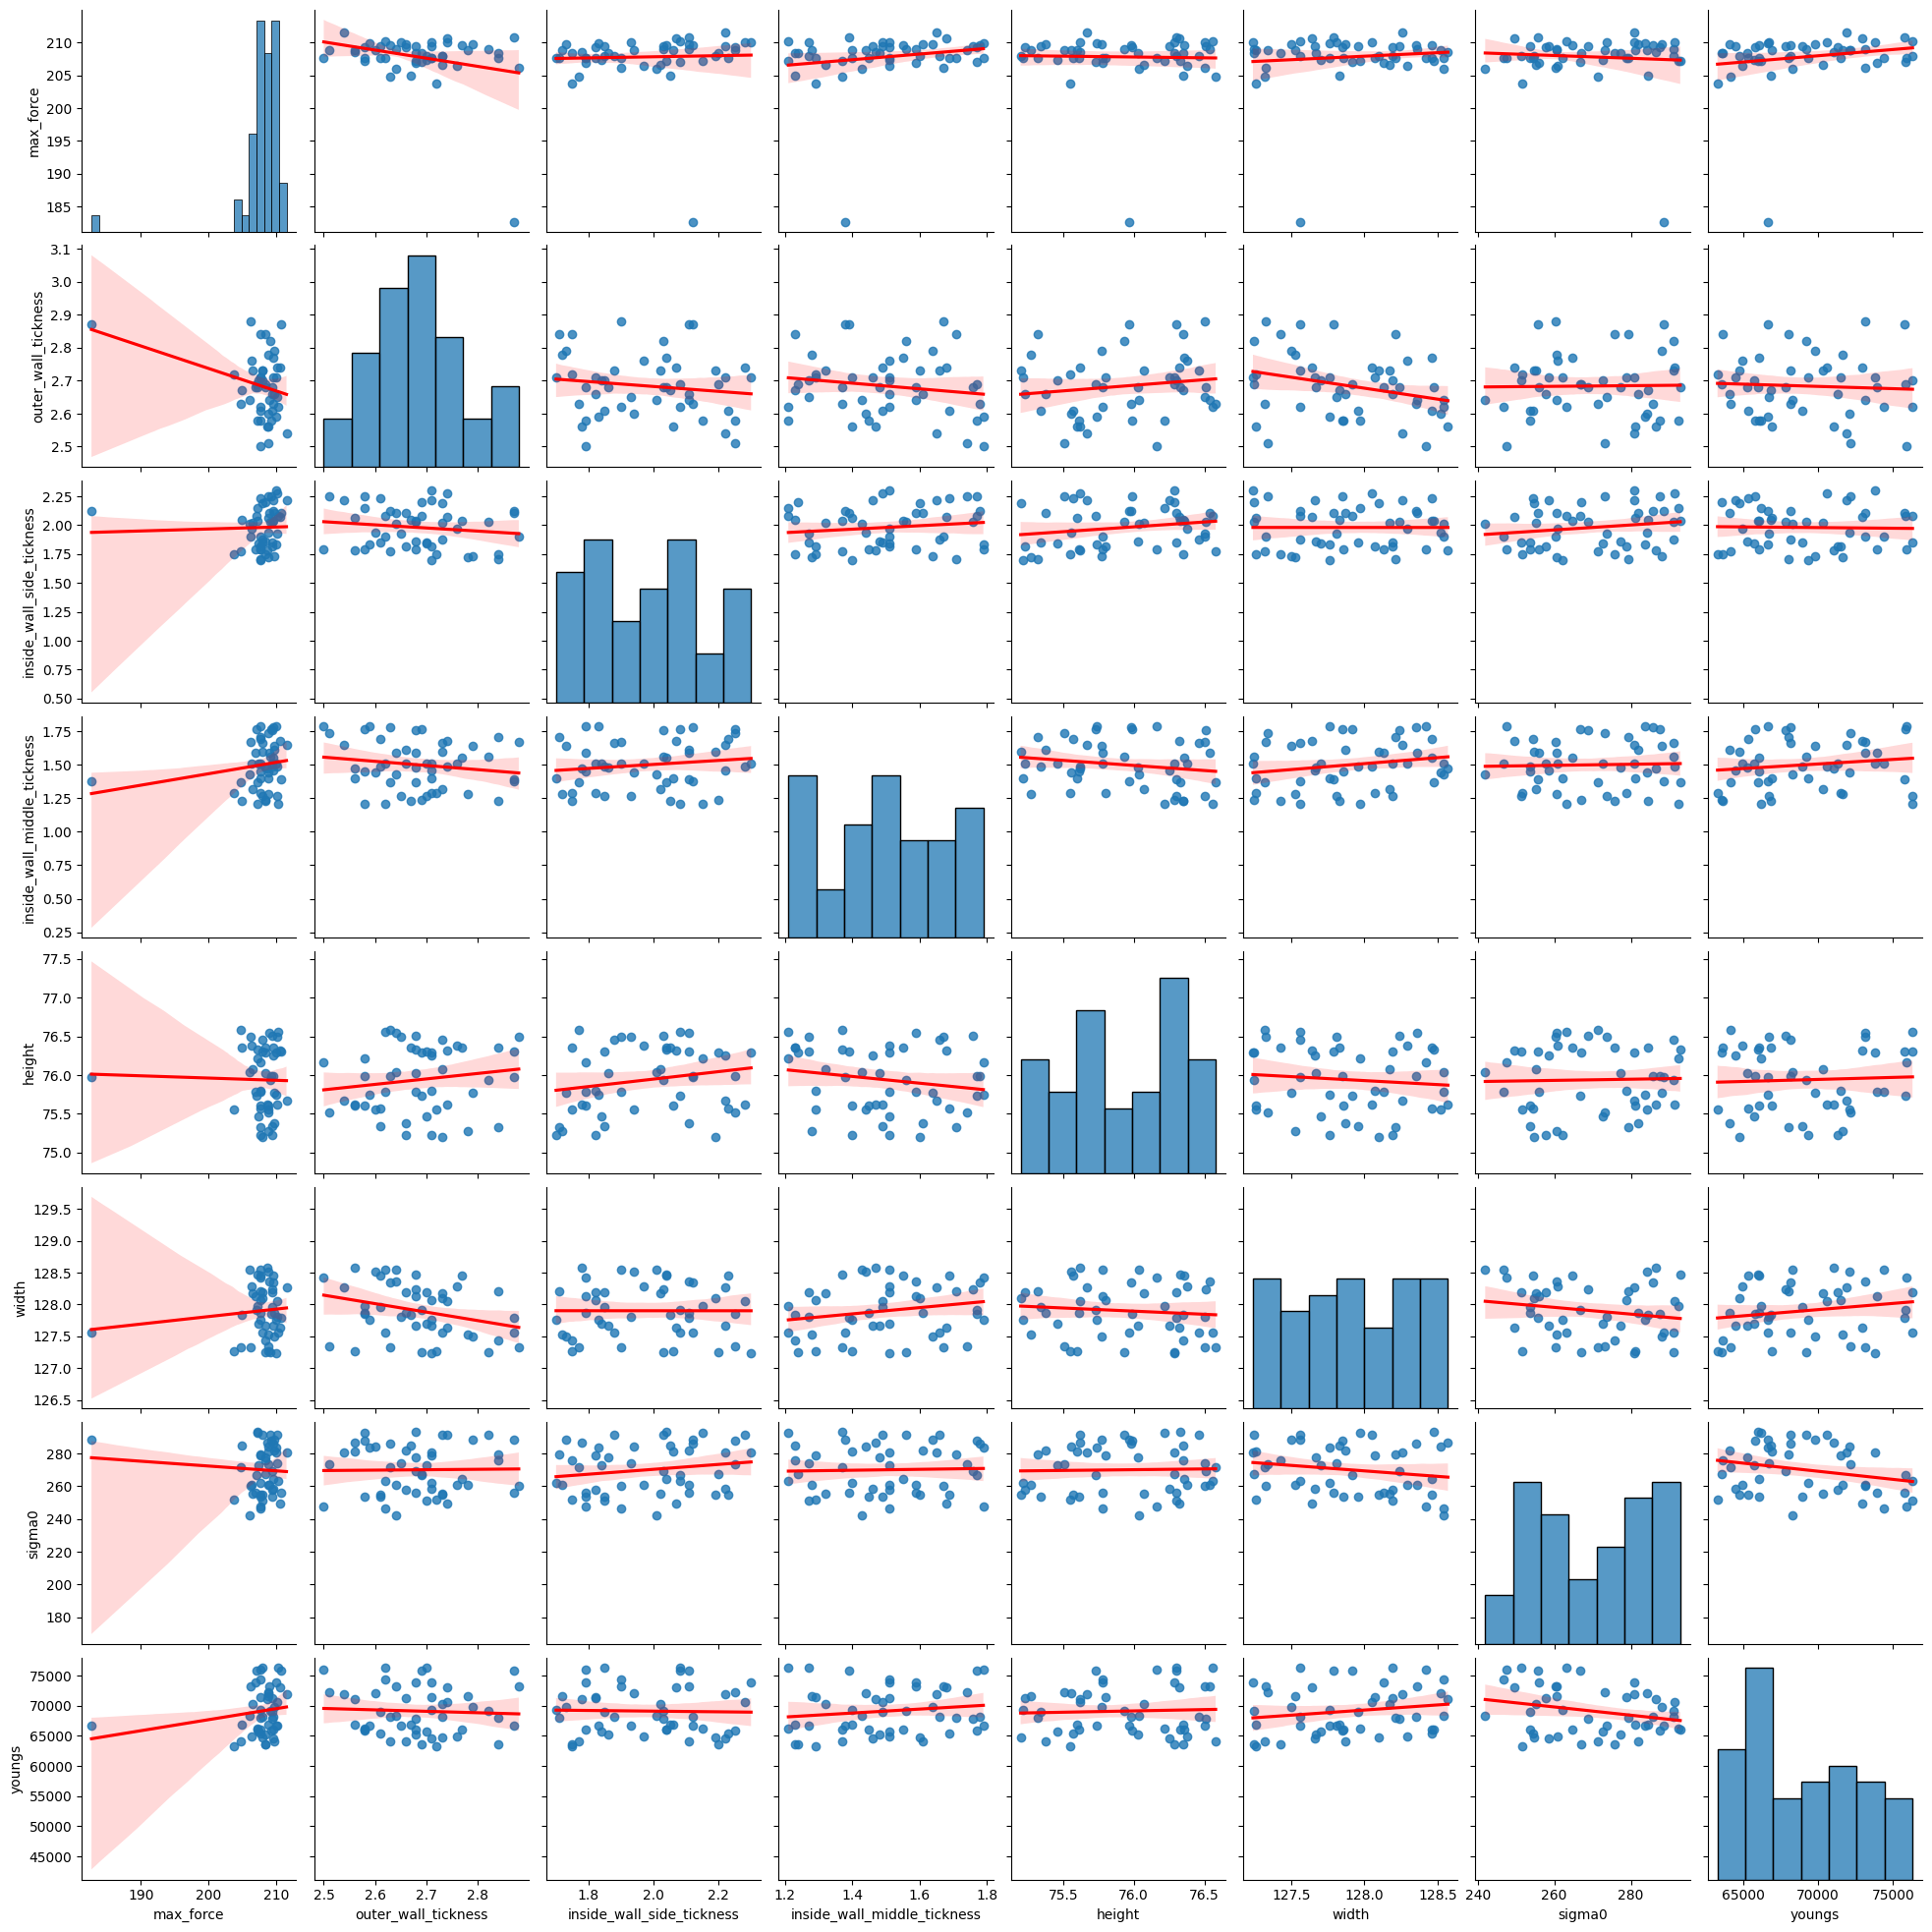

In [30]:
sb.pairplot(max_force_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [31]:
main_df = mean_force_df.join(max_force_df['max_force'])
main_df = main_df.join(energy_df['Energy'])
header = parameters.columns.tolist()[1:]
main_df = main_df[['Energy', 'mean_force', 'max_force'] + header]
main_df.head()

,Energy,mean_force,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,8957.871386,116.836891,204.886297,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,NaN,120.458615,209.503500,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,NaN,120.810000,210.079734,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,NaN,119.547320,209.322422,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,NaN,120.708946,207.681906,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


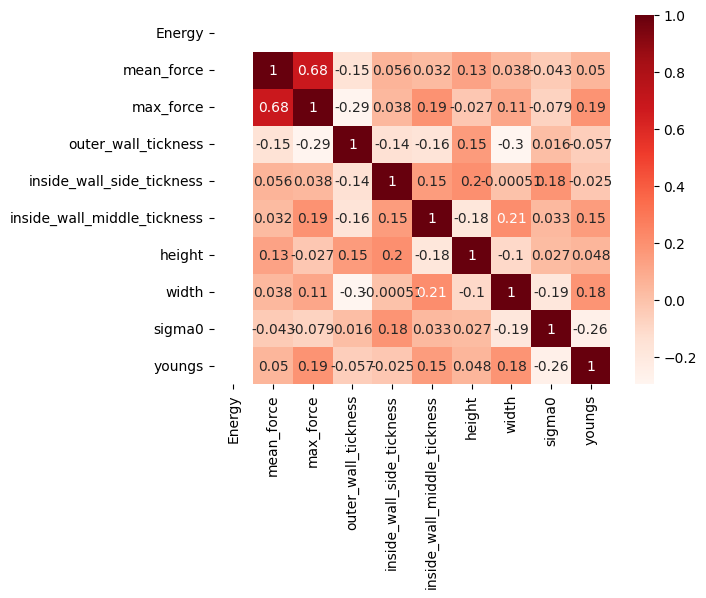

In [32]:
dataplot = sb.heatmap(main_df.corr(), cmap="Reds", annot=True)  
plt.show()

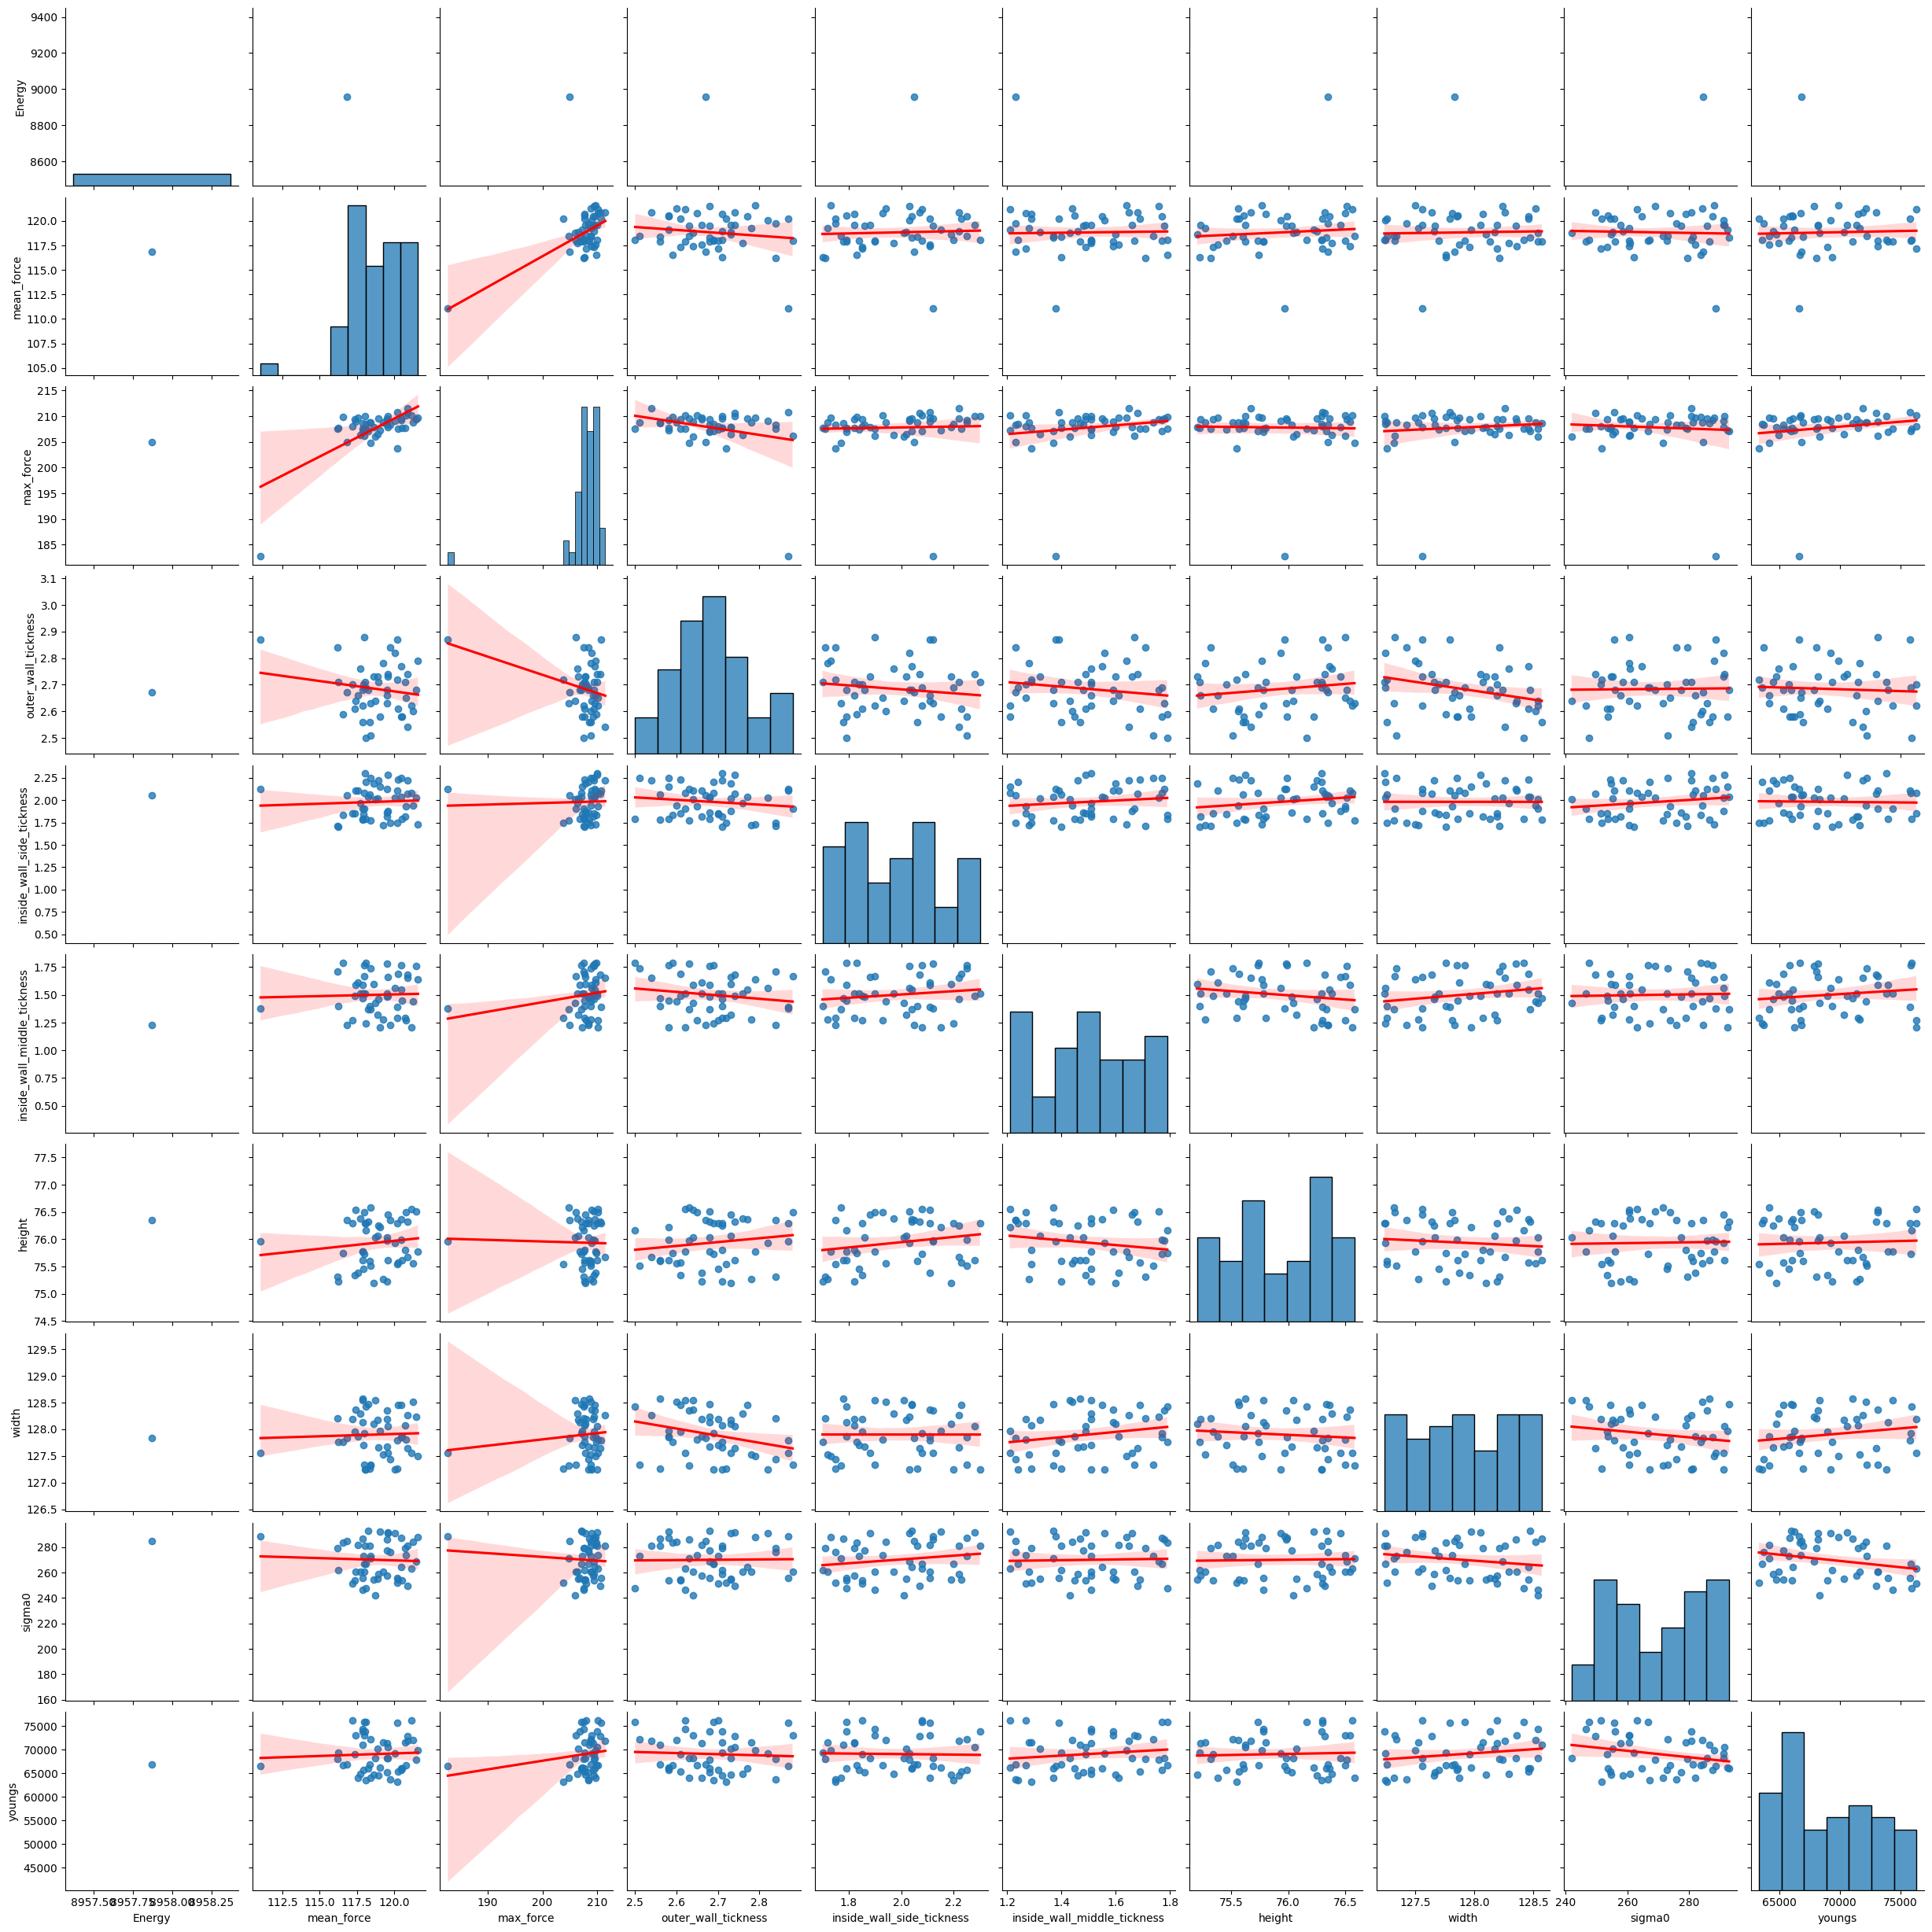

In [33]:
sb.pairplot(main_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})